<a href="https://colab.research.google.com/github/Lee-jun-young98/Bio_signal_analysis/blob/main/%5B1%5D%EC%88%9C%EC%B2%9C%ED%96%A5%EB%8C%80_MIMIC_Data_Statistics_211215.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MIMIC-III데이터 실습 관련 코드입니다
###실습진행 순서
1. 데이터 통계 자료 만들기
2. 데이터 레이블링 코드 실습
3. 메디컬 스코어 계산 실습




###필요한 데이터들 다운 받기
1. 아래의 코드 블럭 실행
2. 실행 후 나오는 링크를 클릭

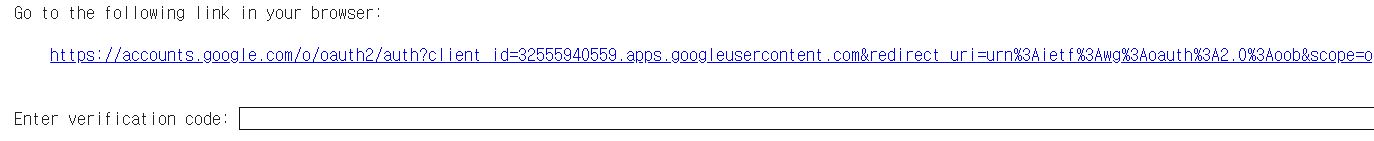
3. 로그인

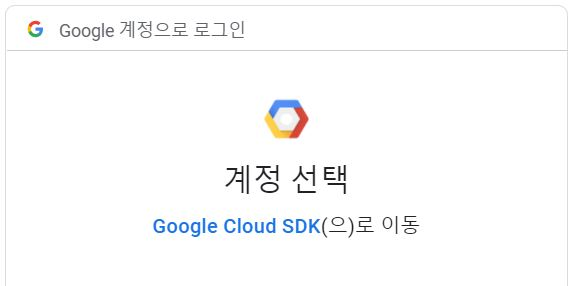
4. 허용 클릭

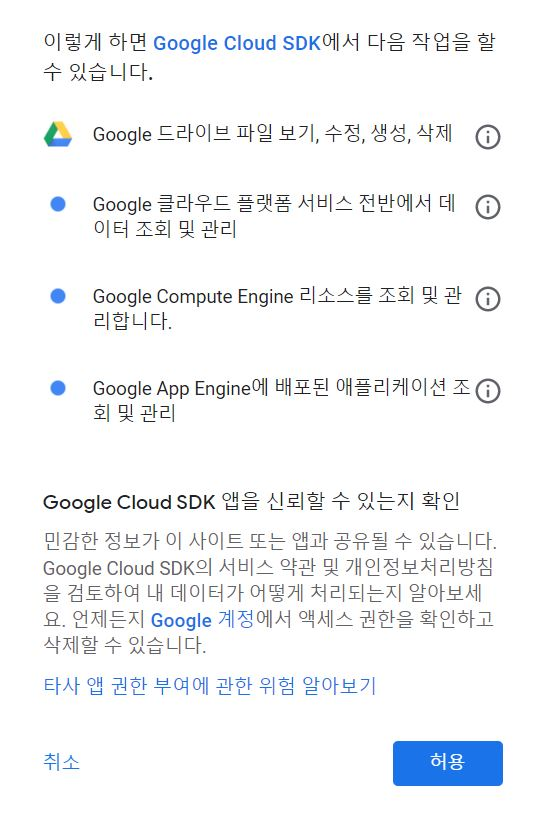
5. 코드 복사

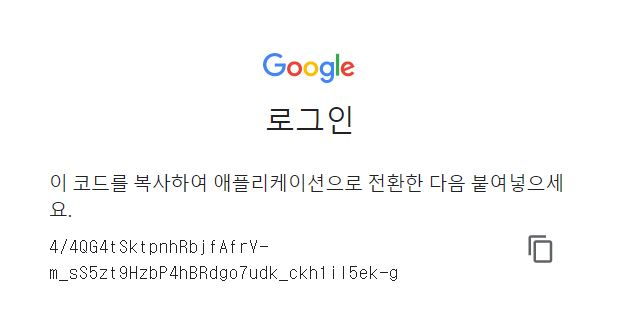
6. 코드 붙여넣기

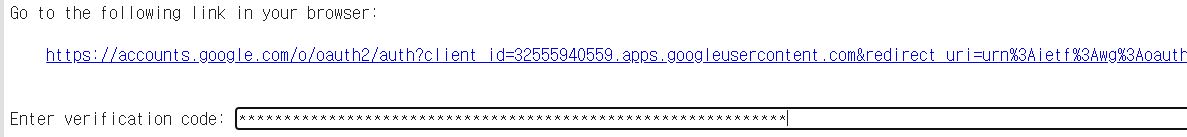

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from tqdm import tqdm

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
FILE_IDS = ["1-91Ad_3yQQ0T6ROnlxqbbgEFc6tiZAsY",
            "1-RbUxW2hF2ayWDhkMqGfKZvzEKwiLqQX",
            "1r76_XuYikaeswLAIpIbPpkx_kXgJob3a",
            "1-I25PxwI6qpDrNtDJD_jEnLl_MXh9hjH",
            "1-3YZEp8xFYplMjvFSfzb637WwA8OwW_2",
            "1-HhOwcDMse4BevovRkxOBICe5zZ3YraZ"]
FILE_NAMES = ['PATIENTS.csv', 'LABEVENTS.csv', 'CHARTEVENTS.csv',
              'D_ITEMS.csv', 'D_LABITEMS.csv', 'ADMISSIONS.csv']
for f_id, f_name in tqdm(zip(FILE_IDS, FILE_NAMES), desc="Download Files...", total=len(FILE_IDS), ncols=75):
  download_file = drive.CreateFile({'id': f_id})
  download_file.GetContentFile(f_name)

Download Files...: 100%|█████████████████████| 6/6 [00:23<00:00,  3.95s/it]


In [ ]:
#필요한 패키지들 import하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
patients = pd.read_csv('PATIENTS.csv')
print(patients.columns) #Print field names of PATIENTS.csv
print(patients[:5]) #Print first 5 rows of PATIENTS.csv
print(len(patients)) #Print the total number of rows in PATIENTS.csv

Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG'],
      dtype='object')
   ROW_ID  SUBJECT_ID GENDER  ... DOD_HOSP              DOD_SSN EXPIRE_FLAG
0   42961       86381      F  ...      NaN                  NaN           0
1   35892       59198      M  ...      NaN                  NaN           0
2   42871       85987      M  ...      NaN                  NaN           0
3   17821       18862      M  ...      NaN                  NaN           0
4   19714       20896      M  ...      NaN  2113-10-18 00:00:00           1

[5 rows x 8 columns]
1000


In [ ]:
chartevents = pd.read_csv('CHARTEVENTS.csv', low_memory=False)
print(chartevents.columns)
print(chartevents[:5])
total_rows_chartevents = len(chartevents)
print(total_rows_chartevents)

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID', 'CHARTTIME',
       'STORETIME', 'CGID', 'VALUE', 'VALUENUM', 'VALUEUOM', 'WARNING',
       'ERROR', 'RESULTSTATUS', 'STOPPED'],
      dtype='object')
   ROW_ID  SUBJECT_ID  HADM_ID  ICUSTAY_ID  ...  WARNING ERROR RESULTSTATUS  STOPPED
0  147286        1257   160336    237955.0  ...      0.0   0.0          NaN      NaN
1  147287        1257   160336    237955.0  ...      0.0   0.0          NaN      NaN
2  147288        1257   160336    237955.0  ...      0.0   0.0          NaN      NaN
3  147289        1257   160336    237955.0  ...      0.0   0.0          NaN      NaN
4  147290        1257   160336    237955.0  ...      0.0   0.0          NaN      NaN

[5 rows x 15 columns]
7241351


In [ ]:
labevents = pd.read_csv('LABEVENTS.csv', low_memory=False)
print(labevents.columns)
print(labevents[:5])
total_rows_labevents = len(labevents)
print(total_rows_labevents)

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ITEMID', 'CHARTTIME', 'VALUE',
       'VALUENUM', 'VALUEUOM', 'FLAG'],
      dtype='object')
   ROW_ID  SUBJECT_ID  HADM_ID  ITEMID  ... VALUE VALUENUM  VALUEUOM FLAG
0   24146          55      NaN   51248  ...  27.0     27.0        pg  NaN
1   24147          55      NaN   51249  ...  33.0     33.0         %  NaN
2   24148          55      NaN   51250  ...    82     82.0        fL  NaN
3   24149          55      NaN   51254  ...   4.5      4.5         %  NaN
4   24150          55      NaN   51256  ...  66.7     66.7         %  NaN

[5 rows x 9 columns]
615328


In [ ]:
admissions = pd.read_csv('ADMISSIONS.csv', low_memory=False)
print(admissions.columns)
print(admissions[:5])
print(len(admissions))

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')
   ROW_ID  SUBJECT_ID  ...  HOSPITAL_EXPIRE_FLAG HAS_CHARTEVENTS_DATA
0      54          55  ...                     0                    1
1      83          82  ...                     0                    1
2      90          87  ...                     0                    1
3     198         148  ...                     0                    1
4     630         505  ...                     0                    1

[5 rows x 19 columns]
1262


In [ ]:
d_items = pd.read_csv('D_ITEMS.csv', low_memory=False)
print(d_items.columns)
print(d_items[:5])
print(len(d_items))

Index(['ROW_ID', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO',
       'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID'],
      dtype='object')
   ROW_ID  ITEMID  ... PARAM_TYPE CONCEPTID
0     457     497  ...        NaN       NaN
1     458     498  ...        NaN       NaN
2     459     499  ...        NaN       NaN
3     460     500  ...        NaN       NaN
4     461     501  ...        NaN       NaN

[5 rows x 10 columns]
12487


In [ ]:
print(d_items[['ITEMID', 'LABEL']])

       ITEMID                                        LABEL
0         497  Patient controlled analgesia (PCA) [Inject]
1         498                            PCA Lockout (Min)
2         499                               PCA Medication
3         500                               PCA Total Dose
4         501                           PCV Exh Vt (Obser)
...       ...                                          ...
12482  226757                        GCSMotorApacheIIValue
12483  226758                       GCSVerbalApacheIIValue
12484  226759                            HCO3ApacheIIValue
12485  226760                                    HCO3Score
12486  226761                      HematocritApacheIIScore

[12487 rows x 2 columns]


In [ ]:
#Heart rate의 ITEMID 확인해보기
d_items[d_items['LABEL'] == 'Heart Rate']

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
475,212,211,Heart Rate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
11498,12712,220045,Heart Rate,HR,metavision,chartevents,Routine Vital Signs,bpm,Numeric,NaN


In [ ]:
##코드 실습
##아래의 항목들의 ITEMID를 확인해보세요
## "Respiratory Rate", "Arterial BP [Systolic]", "NBP [Systolic]", "Arterial Blood Pressure systolic"
## "Non Invasive Blood Pressure systolic", "ART BP Systolic	"
d_items[d_items['LABEL'].isin(["Respiratory Rate"])]

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
263,575,618,Respiratory Rate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
11524,12738,220210,Respiratory Rate,RR,metavision,chartevents,Respiratory,insp/min,Numeric,NaN


In [ ]:
d_items[d_items['LABEL'].astype(str).str.contains('Temp')] #Search labels that contain 'Temp' strings

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
236,548,591,RLE [Temperature],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
242,554,597,RUE [Temperature],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
647,384,417,Inspired Gas Temp,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
654,391,424,LLE [Temp],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
657,394,427,LUE [Temp],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12026,12816,223872,Inspired Gas Temp.,Inspired Gas Temp.,metavision,chartevents,Respiratory,?C,Numeric,NaN
12254,14446,226329,Blood Temperature CCO (C),Blood Temp CCO (C),metavision,chartevents,Routine Vital Signs,?C,Numeric,NaN
12286,14478,226477,Temporary Pacemaker Wires Inserted,Temporary Pacemaker Wires Inserted,metavision,procedureevents_mv,4-Procedures,None,Process,NaN
12366,12757,223761,Temperature Fahrenheit,Temperature F,metavision,chartevents,Routine Vital Signs,?F,Numeric,NaN


In [ ]:
d_labitems = pd.read_csv('D_LABITEMS.csv', low_memory=False)
print(d_labitems.columns)
print(d_labitems[:5])
print(len(d_labitems))

Index(['ROW_ID', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE'], dtype='object')
   ROW_ID  ITEMID  ...    CATEGORY LOINC_CODE
0     546   51346  ...  Hematology    26447-3
1     547   51347  ...  Hematology    26451-5
2     548   51348  ...  Hematology    30398-2
3     549   51349  ...  Hematology    26506-6
4     550   51350  ...  Hematology        NaN

[5 rows x 6 columns]
753


In [ ]:
print(d_labitems[['ITEMID', 'LABEL']])

     ITEMID                       LABEL
0     51346                      Blasts
1     51347                 Eosinophils
2     51348             Hematocrit, CSF
3     51349  Hypersegmented Neutrophils
4     51350           Immunophenotyping
..      ...                         ...
748   51551             VOIDED SPECIMEN
749   51552             VOIDED SPECIMEN
750   51553             VOIDED SPECIMEN
751   51554             VOIDED SPECIMEN
752   51555    SURFACTANT ALBUMIN RATIO

[753 rows x 2 columns]


In [ ]:
##Bilirubin의 ITEMID 확인해보기
d_labitems[d_labitems['LABEL'] == "Bilirubin"]

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
118,664,51464,Bilirubin,Urine,Hematology,5770-3


In [ ]:
##코드 실습
##아래의 항목들의 ITEMID를 확인해보세요
## "Lactate", "pH", "Potassium", "Sodium"
d_labitems[d_labitems['LABEL'].isin(["Lactate", "pH", "Potassium", "Sodium"])]

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
140,14,50813,Lactate,Blood,Blood Gas,32693-4
147,21,50820,pH,Blood,Blood Gas,11558-4
158,32,50831,pH,Other Body Fluid,Blood Gas,2748-2
160,34,50833,Potassium,Other Body Fluid,Blood Gas,2821-7
298,172,50971,Potassium,Blood,Chemistry,2823-3
310,184,50983,Sodium,Blood,Chemistry,2951-2
420,294,51094,pH,Urine,Chemistry,2756-5
690,691,51491,pH,Urine,Hematology,5803-2


##데이터 통계 자료 만들기

In [ ]:
#ITEMID for some features
VITAL_SIGNS = {'PULSE': [220045, 211],
               'RESP': [220210, 618],
               'TEMP_C': [223762, 676, 677],
               'TEMP_F': [223761, 678, 679],
               'SBP': [220050, 220179, 225309, 51, 455],
               'DBP': [220051, 220180, 225310, 8368, 8441]
               }
LABS = {'BILIRUBIN': [50885],
        'LACTATE': [50813],
        'pH': [50820, 50831],
        'SODIUM': [50983],
        'POTASSIUM': [50971],
        'CREATININE': [50912],
        'WBC': [51301]
        }

In [ ]:
#Vital Sings
pulse = chartevents.loc[chartevents['ITEMID'].isin(VITAL_SIGNS['PULSE'])]['VALUENUM'].dropna()
resp = chartevents.loc[chartevents['ITEMID'].isin(VITAL_SIGNS['RESP'])]['VALUENUM'].dropna()
temp_c = chartevents.loc[chartevents['ITEMID'].isin(VITAL_SIGNS['TEMP_C'])]['VALUENUM'].dropna()
temp_f = chartevents.loc[chartevents['ITEMID'].isin(VITAL_SIGNS['TEMP_F'])]['VALUENUM'].dropna()
sbp = chartevents.loc[chartevents['ITEMID'].isin(VITAL_SIGNS['SBP'])]['VALUENUM'].dropna()
dbp = chartevents.loc[chartevents['ITEMID'].isin(VITAL_SIGNS['DBP'])]['VALUENUM'].dropna()

In [ ]:
#Lab Test
bilirubin = labevents.loc[labevents['ITEMID'].isin(LABS['BILIRUBIN'])]['VALUENUM'].dropna()
lactate = labevents.loc[labevents['ITEMID'].isin(LABS['LACTATE'])]['VALUENUM'].dropna()
ph = labevents.loc[labevents['ITEMID'].isin(LABS['pH'])]['VALUENUM'].dropna()
sodium = labevents.loc[labevents['ITEMID'].isin(LABS['SODIUM'])]['VALUENUM'].dropna()
potassium = labevents.loc[labevents['ITEMID'].isin(LABS['POTASSIUM'])]['VALUENUM'].dropna()
creatinine = labevents.loc[labevents['ITEMID'].isin(LABS['CREATININE'])]['VALUENUM'].dropna()
wbc = labevents.loc[labevents['ITEMID'].isin(LABS['WBC'])]['VALUENUM'].dropna()


In [ ]:
#Print Stats of Values
print('PULSE: MIN = {}, MAX = {}, MEAN = {:.3f}, MEDIAN = {}'.format(np.min(pulse), np.max(pulse), np.mean(pulse), np.median(pulse)))
print('RESP: MIN = {}, MAX = {}, MEAN = {:.3f}, MEDIAN = {}'.format(np.min(resp), np.max(resp), np.mean(resp), np.median(resp)))
print('SBP: MIN = {}, MAX = {}, MEAN = {:.3f}, MEDIAN = {}'.format(np.min(sbp), np.max(sbp), np.mean(sbp), np.median(sbp)))


PULSE: MIN = 0.0, MAX = 218.0, MEAN = 101.727, MEDIAN = 93.0
RESP: MIN = 0.0, MAX = 119.0, MEAN = 20.117, MEDIAN = 20.0
SBP: MIN = -2.0, MAX = 11676.0, MEAN = 121.303, MEDIAN = 119.0


In [ ]:
#코드 실습
#Lab Test 항목들 중 일부의 최소, 최대, 평균값을 구해보세요.
print('WBC: MIN = {}, MAX = {}, MEAN = {:.3f}, MEDIAN = {}'.format(np.min(wbc), np.max(wbc), np.mean(wbc), np.median(wbc)))
norm_pulse = (pulse - np.min(pulse)) / (np.max(pulse) - np.min(pulse))
norm_ph = (ph - np.min(ph)) / (np.max(ph) - np.min(ph))
norm_wbc = (wbc - np.min(wbc)) / (np.max(wbc) - np.min(wbc))

WBC: MIN = 0.0, MAX = 181.0, MEAN = 10.424, MEDIAN = 9.1


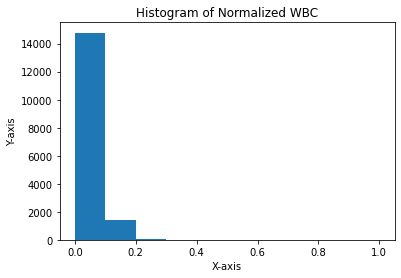

In [ ]:
#Plot histogram of features
hist = plt.hist(norm_wbc)
plt.title('Histogram of Normalized WBC')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

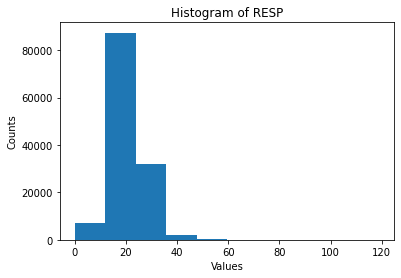

In [ ]:
#실습코드
#다른 항목들의 히스토그램도 그려보세요.
hist = plt.hist(resp)
plt.title('Histogram of RESP')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.show()

(450,)


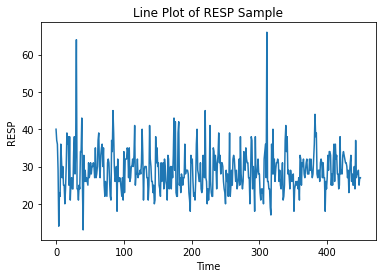

In [ ]:
#시계열 Plot해보기

HADM_ID = admissions['HADM_ID'].to_numpy()

resp_sample = chartevents.loc[(chartevents['HADM_ID'] == HADM_ID[3]) & chartevents['ITEMID'].isin(VITAL_SIGNS['RESP'])]['VALUENUM'].dropna().to_numpy()
print(resp_sample.shape)

line = plt.plot(resp_sample)
plt.title('Line Plot of RESP Sample')
plt.xlabel('Time')
plt.ylabel('RESP')
plt.show()

(355,)


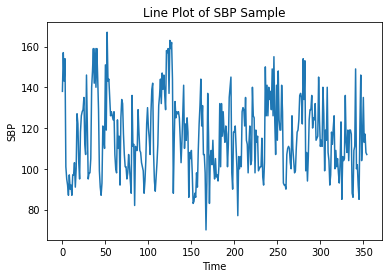

In [ ]:
#실습 코드
#다른 항목들도 시간에 따른 변화를 그래프로 그려보세요.
HADM_ID = admissions['HADM_ID'].to_numpy()

sbp_sample = chartevents.loc[(chartevents['HADM_ID'] == HADM_ID[500]) & chartevents['ITEMID'].isin(VITAL_SIGNS['SBP'])]['VALUENUM'].dropna().to_numpy()
print(sbp_sample.shape)

line = plt.plot(sbp_sample)
plt.title('Line Plot of SBP Sample')
plt.xlabel('Time')
plt.ylabel('SBP')
plt.show()